In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('scan_data.csv', header=None)
# 最初の3列は削除
point_data = data.drop([0, 1, 2], axis=1)
# 10列目から137列目までを取り出す
# point_data = data.iloc[:, 10:135]
angle_min = -2.356194
angle_max = 2.356194
angle_increment = 0.004363
point_data

,3,4,5,6,7,8,9,10,11,12,...,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083
0,1.028,1.030,1.031,1.031,1.051,1.053,1.053,1.053,1.053,1.054,...,1.616,1.618,1.618,1.619,1.623,1.623,1.619,1.619,1.613,1.598
1,1.035,1.036,1.042,1.046,1.052,1.052,1.047,1.047,1.047,1.047,...,1.614,1.616,1.618,1.618,1.618,1.618,1.618,1.615,1.609,1.607
2,1.049,1.049,1.049,1.049,1.049,1.049,1.049,1.060,1.063,1.063,...,1.607,1.606,1.606,1.606,1.610,1.610,1.610,1.610,1.610,1.606
3,1.038,1.039,1.043,1.048,1.053,1.053,1.057,1.063,1.064,1.064,...,1.604,1.605,1.607,1.608,1.608,1.608,1.608,1.607,1.606,1.590
4,1.044,1.045,1.052,1.052,1.057,1.059,1.062,1.068,1.068,1.068,...,1.603,1.604,1.604,1.604,1.604,1.604,1.603,1.602,1.586,1.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.325,0.327,0.349,0.368,0.369,0.369,0.368,0.364,0.360,0.353,...,0.369,0.370,0.370,0.374,0.370,0.370,0.370,0.367,0.364,0.343
408,0.342,0.342,0.350,0.350,0.356,0.360,0.360,0.360,0.360,0.360,...,0.369,0.373,0.379,0.379,0.379,0.365,0.364,0.364,0.360,0.359
409,0.322,0.335,0.358,0.360,0.360,0.360,0.360,0.360,0.359,0.359,...,0.376,0.379,0.381,0.381,0.381,0.368,0.368,0.365,0.360,0.342
410,0.331,0.344,0.346,0.352,0.362,0.362,0.362,0.362,0.361,0.361,...,0.373,0.373,0.373,0.377,0.377,0.377,0.370,0.368,0.366,0.351


180 : 900


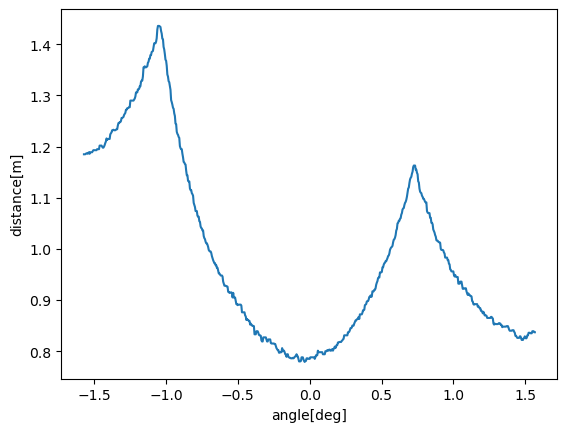

In [2]:
# ロボットが反時計回りにtheta[rad]回転していると仮定する
theta = 0 * np.pi / 180
# 検出される範囲は-135度から135度まで0.25度刻みで1081個のデータがある
# 横軸を角度、縦軸を距離としてプロット
plt.figure()
i = 130
# 60+θ度から60-θ度までのデータを取り出す
start = int((-angle_min - np.pi/2 + theta)/angle_increment)
end = start + int(np.pi/angle_increment)
print(start, ":", end)
limit_data = np.array(point_data.iloc[i, start:end])
angle = np.arange(- np.pi/2 + theta, - np.pi/2 + theta + angle_increment*(end - start), angle_increment)
plt.plot(angle, limit_data)
plt.xlabel('angle[deg]')
plt.ylabel('distance[m]')
plt.show()

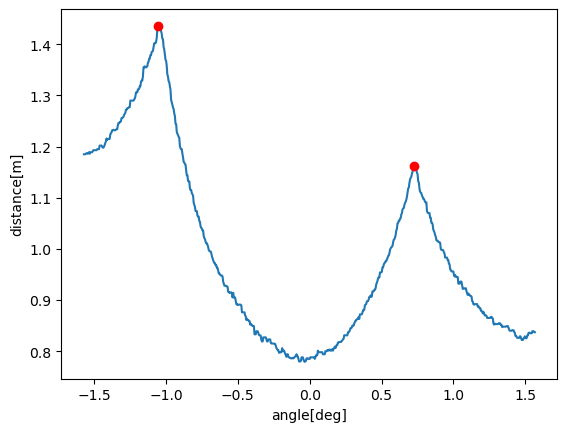

In [3]:
# 0度よりも前と後ろでそれぞれ最大値のインデックスを取得
mid_index = len(limit_data)//2
max_index1 = np.argmax(limit_data[:mid_index])
max_index2 = np.argmax(limit_data[mid_index:]) + mid_index
# 最大値をプロット
plt.plot(angle, limit_data)
plt.plot(angle[max_index1], limit_data[max_index1], 'ro')
plt.plot(angle[max_index2], limit_data[max_index2], 'ro')
plt.xlabel('angle[deg]')
plt.ylabel('distance[m]')
plt.show()

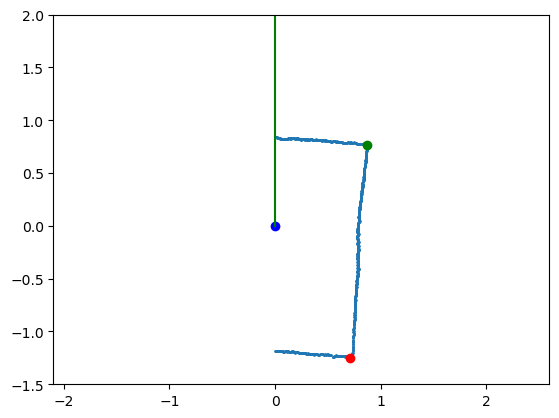

In [4]:
# 極座標の点群を直交座標に変換
x = []
y = []
for i in range(len(limit_data)):
    x.append(limit_data[i]*np.cos(angle[i]))
    y.append(limit_data[i]*np.sin(angle[i]))
plt.scatter(x, y, s=1)
# max_index1とmax_index2の点を赤でプロット
plt.scatter(x[max_index1], y[max_index1], c='red')
plt.scatter(x[max_index2], y[max_index2], c='green')
# 原点に青い点をプロット
plt.scatter(0, 0, c='blue')
# 原点を通る縦の直線を引く
plt.plot([0, 0], [0, 2], c='green')
# 軸の縮尺を合わせる
plt.axis('equal')
# 描画範囲を設定
plt.xlim(-1, 1.5)
plt.ylim(-1.5, 2)
plt.show()

In [60]:
R1 = limit_data[max_index2]
R2 = limit_data[max_index1]
theta3 = angle[max_index2] - angle[max_index1]
R3_2 = R1**2 + R2**2 - 2*R1*R2*np.cos(theta3)
y = (-R1**2 + R2**2 + R3_2)/(2*np.sqrt(R3_2))
x = np.sqrt(R2**2 - y**2)
print('X:', x, 'Y:', y)
print("true_range:", R2, "\ncalc_range:", np.sqrt(x**2 + y**2))

X: 0.8059333933241626 Y: 1.1885147602770954
true_range: 1.4359999895095823 
calc_range: 1.4359999895095823
